In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# LINE GRAPH

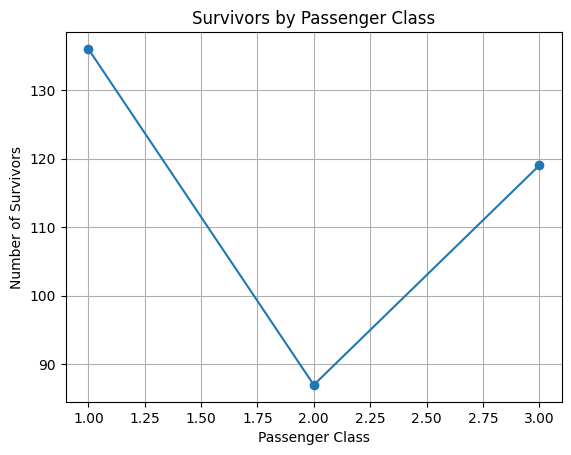

In [ ]:
sPclass = df.groupby('Pclass')['Survived'].sum()

plt.plot(sPclass.index, sPclass.values, marker='o')
plt.title('Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.grid(True)
plt.show()


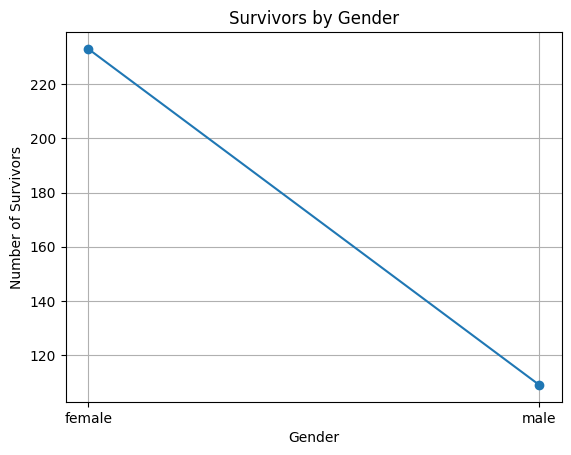

In [ ]:
sGender = df.groupby('Sex')['Survived'].sum()

plt.plot(sGender.index, sGender.values, marker='o')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.grid(True)
plt.show()


# HISTOGRAM

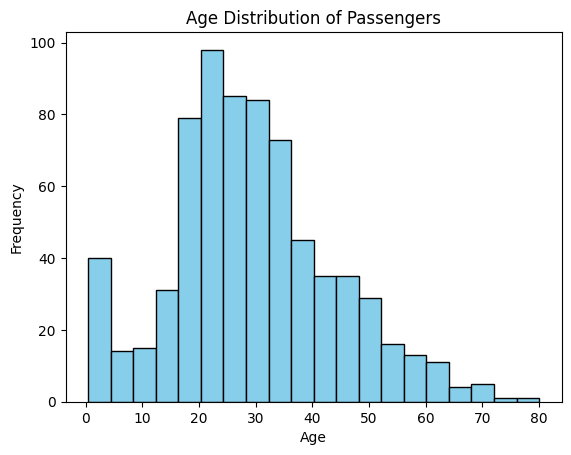

In [13]:
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


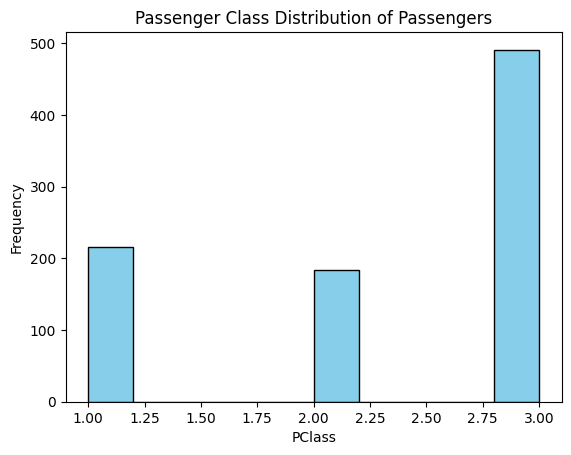

In [11]:
plt.hist(df['Pclass'].dropna(), color='skyblue', edgecolor='black')
plt.title('Passenger Class Distribution of Passengers')
plt.xlabel('PClass')
plt.ylabel('Frequency')
plt.show()


# PIE CHART

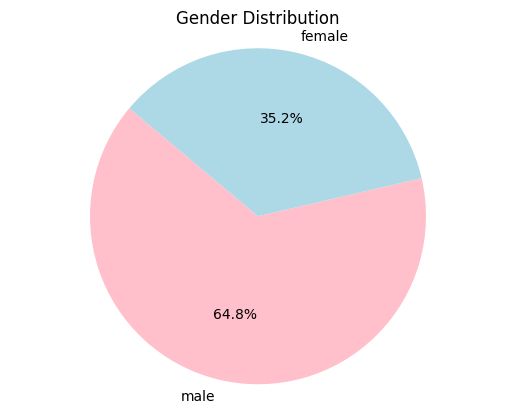

In [ ]:
gendernum = df['Sex'].value_counts()

plt.pie(gendernum, labels=gendernum.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


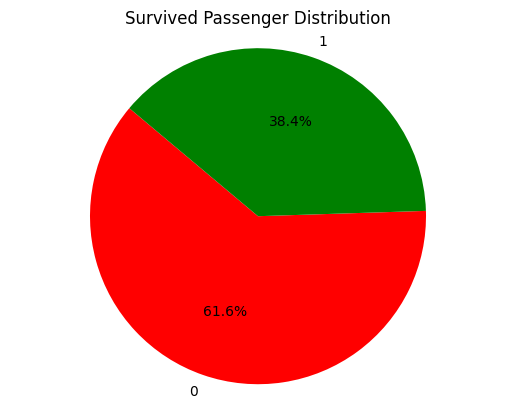

In [ ]:
Sur = df['Survived'].value_counts()

plt.pie(Sur, labels=Sur.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Survived Passenger Distribution')
plt.axis('equal')
plt.show()


# BAR CHART

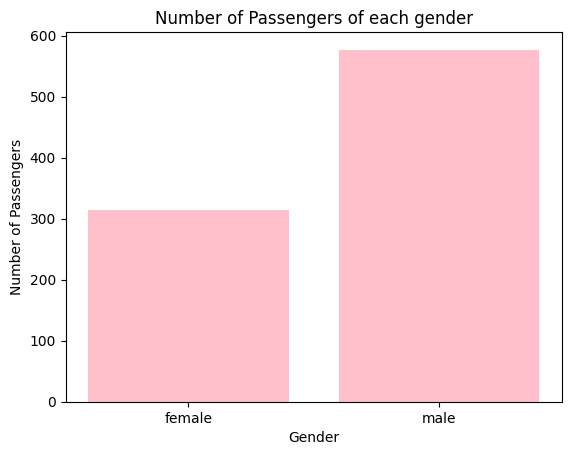

In [ ]:
classcnt = df['Sex'].value_counts().sort_index()
plt.bar(classcnt.index.astype(str), classcnt.values, color='pink')
plt.title('Number of Passengers of each gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()


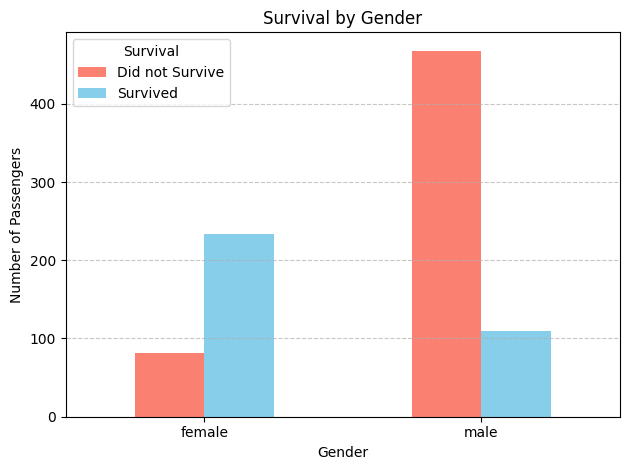

In [ ]:
genderSur = df.groupby(['Sex', 'Survived']).size().unstack()
genderSur.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(['Did not Survive', 'Survived'], title='Survival')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


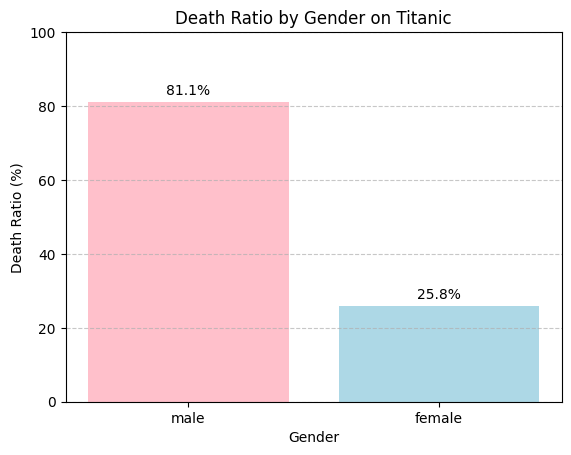

In [ ]:
gnum = df['Sex'].value_counts()
gDeath = df[df['Survived'] == 0]['Sex'].value_counts()
death_ratio = (gDeath / gnum) * 100
plt.bar(death_ratio.index, death_ratio.values, color=['pink', 'lightblue'])
plt.title('Death Ratio by Gender on Titanic')
plt.xlabel('Gender')
plt.ylabel('Death Ratio (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(death_ratio.values):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10)

plt.show()



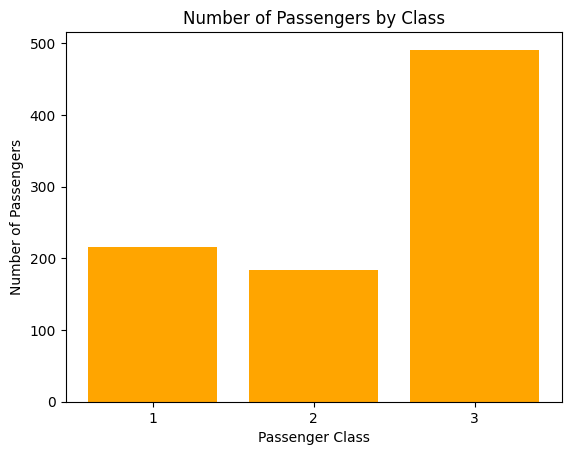

In [ ]:
classnum = df['Pclass'].value_counts().sort_index()

plt.bar(classnum.index.astype(str), classnum.values, color='orange')
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()


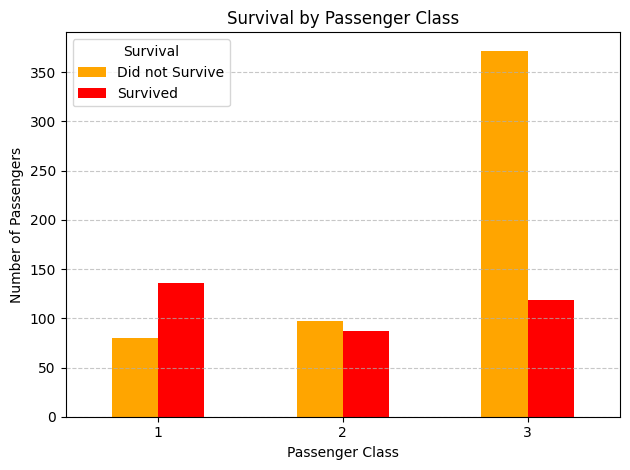

In [ ]:
cSur = df.groupby(['Pclass', 'Survived']).size().unstack()

cSur.plot(kind='bar', color=['orange', 'red'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did not Survive', 'Survived'], title='Survival')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

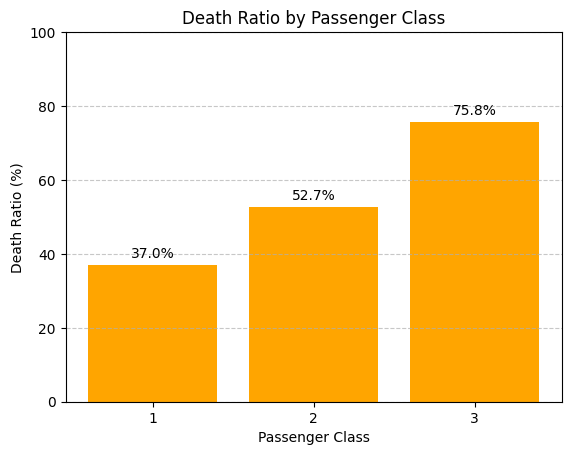

In [ ]:
cnum = df['Pclass'].value_counts().sort_index()

cDeath = df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()

death_ratio_class = (cDeath / cnum) * 100
plt.bar(death_ratio_class.index.astype(str), death_ratio_class.values, color='orange')
plt.title('Death Ratio by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Death Ratio (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(death_ratio_class.values):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10)

plt.show()


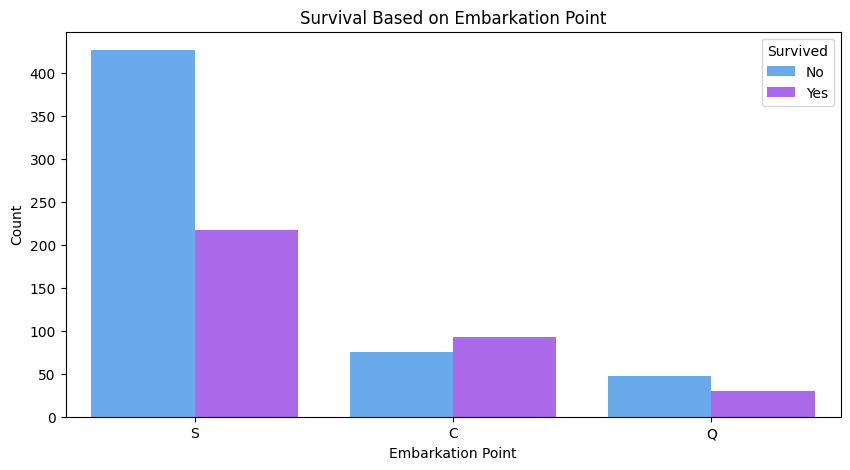

In [44]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Embarked', hue='Survived', data=df, palette='cool')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_9188\2201494320.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", df.groupby('age_group')['Survived'].value_counts())



Survival by Age Group:
 age_group  Survived
Child      1            40
           0            29
Teenager   0            40
           1            30
Adult      0           338
           1           215
Senior     0            17
           1             5
Name: count, dtype: int64


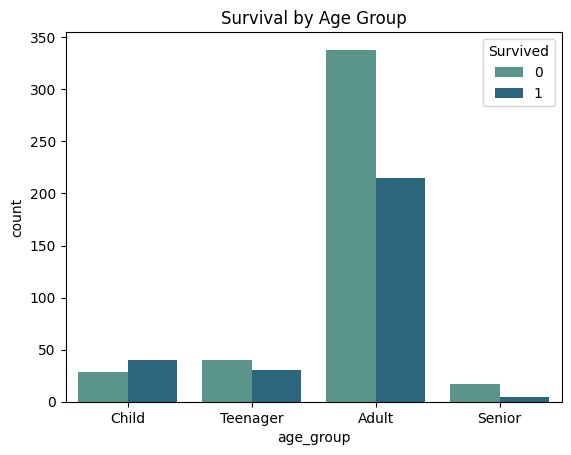

In [54]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 12,18, 60,100], labels=['Child', 'Teenager','Adult','Senior'])

print("\nSurvival by Age Group:\n", df.groupby('age_group')['Survived'].value_counts())

sns.countplot(x='age_group', hue='Survived', data=df,palette='crest')

plt.title('Survival by Age Group')

plt.show()

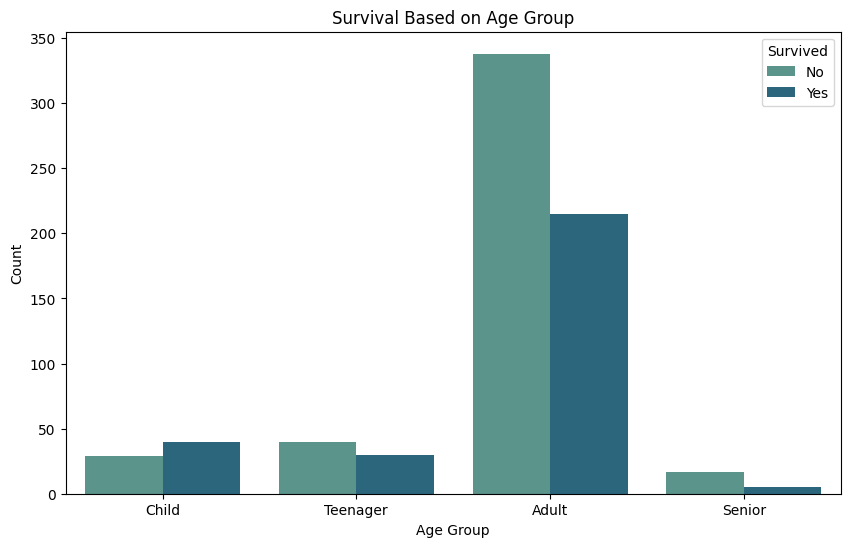

In [55]:
bins = [0, 12, 18, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='Survived', data=df, palette='crest')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

# BOX AND WHISKERS

C:\Users\acer\AppData\Local\Temp\ipykernel_9188\3205571229.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f'Class {i}' for i in sorted(df['Pclass'].unique())])


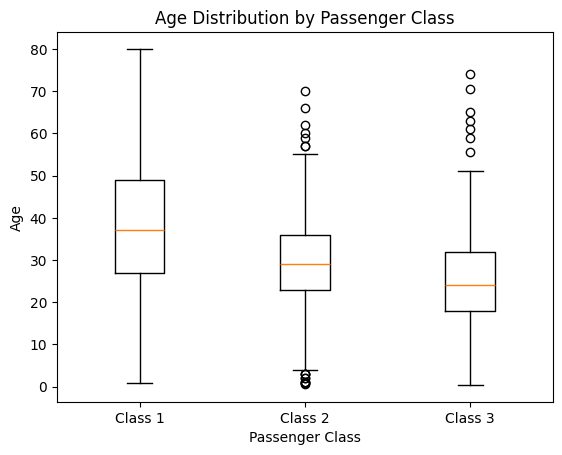

In [36]:
data = [df[df['Pclass'] == i]['Age'].dropna() for i in sorted(df['Pclass'].unique())]

plt.boxplot(data, labels=[f'Class {i}' for i in sorted(df['Pclass'].unique())])
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


# HEATMAP

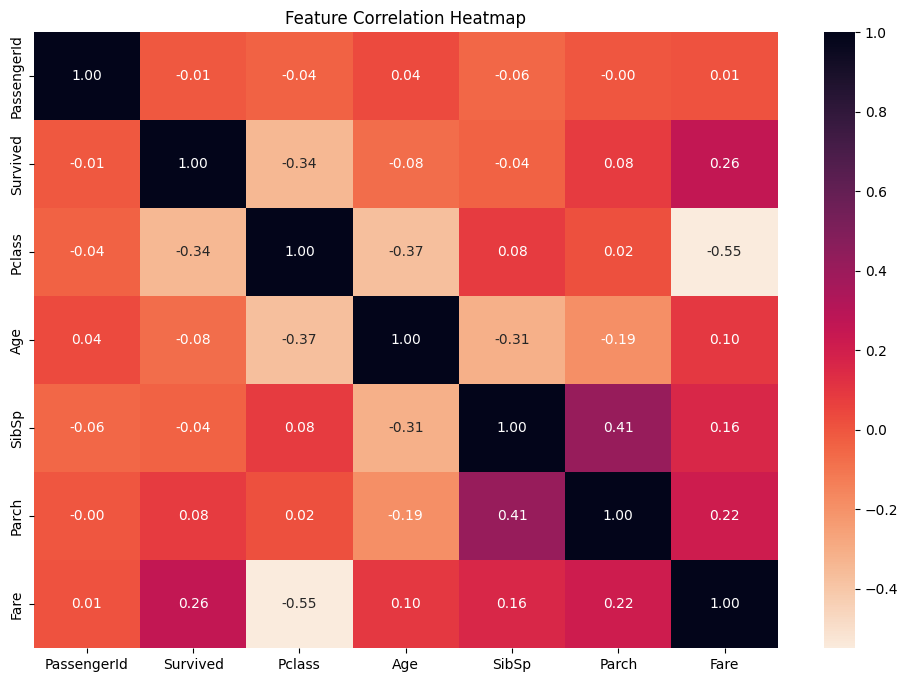

In [ ]:
plt.figure(figsize=(12, 8))
numeric_features = df.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='rocket_r', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()